In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galaxy Properties

In [2]:
# load ECO data
from astropy.io import ascii
data_path = '../data/'
data = ascii.read(data_path + "eco_data.csv")  
print(data.dtype.names)

('NAME', 'RADEG', 'DEDEG', 'CZ', 'LOGMSTAR', 'MEANFSMGR', 'ABSRMAG', 'B_A', 'DGR', 'FC', 'FM16', 'MORPHEL', 'LOGMGAS', 'CCR', 'MODELU_RCORR')


In [3]:
from eco_mocks.eco_galaxy_properties import eco_table

/Users/duncan/Projects/eco_mocks/eco_galaxy_properties.py:42: RuntimeWarning: divide by zero encountered in log
  bijected_b_to_a = np.log(b_to_a/(1.0-b_to_a))


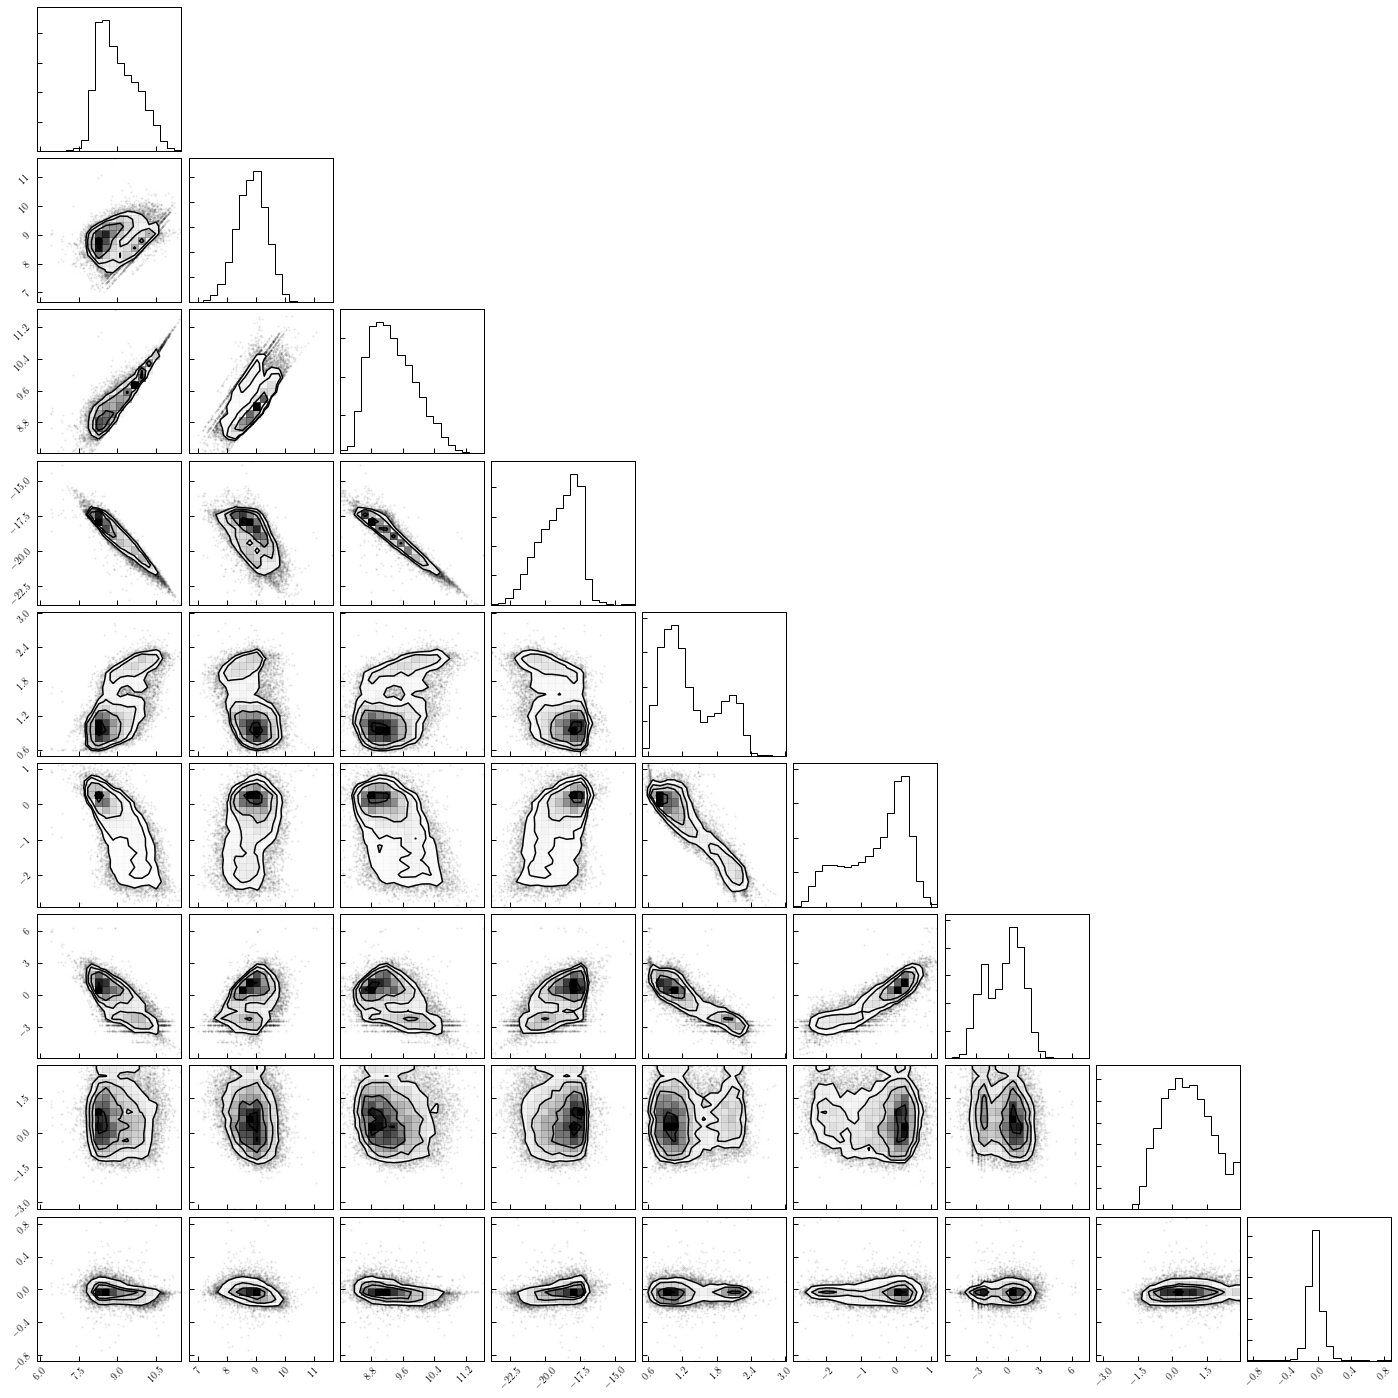

In [4]:
import corner
mask = np.log10(eco_table['baryonic_mass'])>8
values = np.stack((np.log10(eco_table['stellar_mass']),
                   np.log10(eco_table['gas_mass']),
                   np.log10(eco_table['baryonic_mass']),
                   eco_table['abs_rmag'],
                   eco_table['u_minus_r'],
                   eco_table['fsmgr'],
                   eco_table['bijected_fgas'],
                   eco_table['bijected_b_to_a'],
                   eco_table['dgr']
                  )).T
figure = corner.corner(values[mask])